# Neural Network Based ElectroMagnetic Solver

by Sethu Hareesh Kolluru

- hareesh@stanford.edu

# Problem 2: Poisson Equation 

Analytical Solution

In [1]:
################################# import libraries ##################################
import numpy as np
import scipy as sp
import pandas as pd 
import scipy.linalg
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import time
import sys
import seaborn as sns

In [2]:
################################ Create a 2D Grid ###################################
Nx1 = Nx2 = 21
a=b=1
x1 = np.linspace(0, a, Nx1)
x2 = np.linspace(0, b, Nx2)
X1, X2 = np.meshgrid(x1, x2)

In [3]:
psi=np.zeros((x1.shape[0],x2.shape[0]))
psi=np.outer((x2**2),np.sin(np.pi*x1))

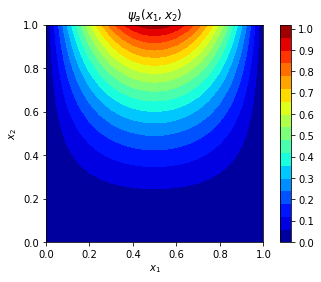

In [4]:
plt.figure(1)
plt.clf()
plt.contourf(x1, x2, psi/(psi.max()),16,cmap="jet") #psi.max()=1
plt.axis("scaled")
plt.colorbar(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title("$\psi_a(x_1,x_2)$")# on %dx%d grid" % (Nx1,Nx2))
plt.show()

Neural Network Based Solution

In [33]:
def calculate_psi(n_x,n_x_rb,n_x_prime_rb):
      
    psi_boundary=np.zeros((x1.shape[0],x2.shape[0]))
    psi_boundary=2*np.outer(x2,np.sin(np.pi*x1))
    #psi_boundary[x2.shape[0]-1,:]=x2[x2.shape[0]-1]*np.sin(np.pi*x1)
    
    f_x=np.zeros((x1.shape[0],x2.shape[0]))
    f_x=np.transpose(np.outer(np.multiply(x1,a-x1),x2))#np.multiply(x2,x2-b))
    
    psi_n=psi_boundary+np.multiply(f_x,(n_x.reshape(Nx1,Nx2)-n_x_rb.reshape(Nx1,Nx2)-n_x_prime_rb.reshape(Nx1,Nx2)))
 
    plt.figure(5)
    plt.clf()
    plt.contourf(x1, x2, psi_n,16,cmap="jet")
    plt.axis("scaled")
    plt.colorbar()#ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title("$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    #plt.axhline(0.5, color='white')
    #plt.axvline(0.5, color='white')
    plt.show()
    
    plt.figure(6)
    plt.clf()
    plt.contourf(x1, x2, np.absolute(psi-psi_n),16,cmap="jet")
    plt.axis("scaled")
    plt.colorbar()
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title("$\psi(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    #plt.axhline(0.5, color='white')
    #plt.axvline(0.5, color='white')
    plt.show()
    
    print("The l2 norm error is : ",np.linalg.norm(psi-psi_n)**2)

In [23]:
def calculate_psi_loop_k(n_x,n_x_rb,n_x_prime_rb):
    desc_contour=['$\psi_t(x_1,x_2)$  :  H=15,K=8','$\psi_t(x_1,x_2)$  :  H=15,K=16','$\psi_t(x_1,x_2)$  :  H=15,K=24','$\psi_t(x_1,x_2)$  :  H=15,K=32','$\psi_t(x_1,x_2)$  :  H=15,K=40']
    filename_contour=['Poisson_NN_K_8_H_15.png','Poisson_NN_K_16_H_15.png','Poisson_NN_K_24_H_15.png','Poisson_NN_K_32_H_15.png','Poisson_NN_K_40_H_15.png']
    desc_delta=['$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :   H=15,K=8','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=16','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=24','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=32','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=40']
    filename_delta=['Poisson_Delta_K_8_H_15.png','Poisson_Delta_K_16_H_15_.png','Poisson_Delta_K_24_H_15.png','Poisson_Delta_K_32_H_15_.png','Poisson_Delta_K_40_H_15.png']
    #desc_error=['$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=5,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=35,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=45,K=16']
    #filename_error=['a1.png','a1.png','a1.png','a1.png','a1.png']
    
    psi_n=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    error=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    data=np.zeros((n_x.shape[0],x1.shape[0]*x2.shape[0]))
    l2_error=np.zeros(n_x.shape[0])
  
    psi_boundary=np.zeros((x1.shape[0],x2.shape[0]))
    psi_boundary=2*np.outer(x2,np.sin(np.pi*x1))
    
    f_x=np.zeros((x1.shape[0],x2.shape[0]))
    f_x=np.transpose(np.outer(np.multiply(x1,a-x1),x2))#np.multiply(x2,x2-b))
  
    for i in range(n_x.shape[0]):
        psi_n[i]=psi_boundary+np.multiply(f_x,(n_x[i].reshape(Nx1,Nx2)-n_x_rb[i].reshape(Nx1,Nx2)-n_x_prime_rb[i].reshape(Nx1,Nx2)))
        plot_contour_k(psi_n[i],x1,x2,desc_contour[i],filename_contour[i])
        plot_delta_k(np.absolute(psi-psi_n[i]),x1,x2,desc_delta[i],filename_delta[i])
        error[i]=np.absolute(psi-psi_n[i])
        data[i]=error[i].reshape((x1.shape[0]*x2.shape[0]))
        l2_error[i]=(np.linalg.norm(psi-psi_n[i]))/np.linalg.norm(psi)
    plot_errorbars_k(np.transpose(data),l2_error,"Error Dependance on K","Error_K")
    print(l2_error)
    
# all Plots to be used for error analysis with variation in k
def plot_contour_k(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi/(psi.max()),16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_delta_k(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi,16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar()#ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_errorbars_k(data,l2_error,desc,filename):
    plt.figure()
    plt.clf()
    ax = plt.subplot()
    plt.boxplot(data,showmeans=False,patch_artist=True,zorder=2)
    plt.xlabel('Training grid resolution, K')
    plt.ylabel('$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.ylim(ymin=0,ymax=(np.max(l2_error)+0.001))#0.016)#
    ax.yaxis.grid(True)
    ax.set_xticks([1,2,3,4,5])
    ax.set_xticklabels(['8','16','24','30', '40'])
    plt.scatter( [1,2,3,4,5], l2_error, c='C1',zorder=3,label="Relative Error Norm")
    plt.legend()
    plt.savefig(filename)
    plt.show()

In [30]:
def calculate_psi_loop_h(n_x,n_x_rb,n_x_prime_rb):
    desc_contour=['$\psi_t(x_1,x_2)$  :  H=5,K=16','$\psi_t(x_1,x_2)$  :  H=15,K=16','$\psi_t(x_1,x_2)$  :  H=25,K=16','$\psi_t(x_1,x_2)$  :  H=35,K=16','$\psi_t(x_1,x_2)$  :  H=45,K=16']
    filename_contour=['Poisson_NN_H_5_K_16.png','Poisson_NN_H_15_K_16.png','Poisson_NN_H_25_K_16.png','Poisson_NN_H_35_K_16.png','Poisson_NN_H_45_K_16.png']
    desc_delta=['$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=5,K=16','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=16','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=25,K=16','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=35,K=16','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=45,K=16']
    filename_delta=['Poisson_Delta_H_5_K_16.png','Poisson_Delta_H_15_K_16.png','Poisson_Delta_H_25_K_16.png','Poisson_Delta_H_35_K_16.png','Poisson_Delta_H_45_K_16.png']
    #desc_error=['$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=5,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=35,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=45,K=16']
    #filename_error=['a1.png','a1.png','a1.png','a1.png','a1.png']
    
    psi_n=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    error=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    data=np.zeros((n_x.shape[0],x1.shape[0]*x2.shape[0]))
    l2_error=np.zeros(n_x.shape[0])
  
    psi_boundary=np.zeros((x1.shape[0],x2.shape[0]))
    psi_boundary=2*np.outer(x2,np.sin(np.pi*x1))
    
    f_x=np.zeros((x1.shape[0],x2.shape[0]))
    f_x=np.transpose(np.outer(np.multiply(x1,a-x1),x2))#np.multiply(x2,x2-b))
  
    for i in range(n_x.shape[0]):
        psi_n[i]=psi_boundary+np.multiply(f_x,(n_x[i].reshape(Nx1,Nx2)-n_x_rb[i].reshape(Nx1,Nx2)-n_x_prime_rb[i].reshape(Nx1,Nx2)))
        plot_contour_h(psi_n[i],x1,x2,desc_contour[i],filename_contour[i])
        plot_delta_h(np.absolute(psi-psi_n[i]),x1,x2,desc_delta[i],filename_delta[i])
        error[i]=np.absolute(psi-psi_n[i])
        data[i]=error[i].reshape((x1.shape[0]*x2.shape[0]))
        l2_error[i]=(np.linalg.norm(psi-psi_n[i]))/np.linalg.norm(psi)
    plot_errorbars_h(np.transpose(data),l2_error,"Error Dependance on K","Error_K")
    print(l2_error)
    
# all Plots to be used for error analysis with variation in h
def plot_contour_h(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi/(psi.max()),16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_delta_h(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi,16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar()#ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_errorbars_h(data,l2_error,desc,filename):
    plt.figure()
    plt.clf()
    ax = plt.subplot()
    plt.boxplot(data,showmeans=False,patch_artist=True,zorder=2)
    plt.xlabel('Number of Hidden Nodes, H')
    plt.ylabel('$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.ylim(ymin=0,ymax=(np.max(l2_error)+0.001))#0.016)
    ax.yaxis.grid(True)
    ax.set_xticks([1,2,3,4,5])
    ax.set_xticklabels(['5','15','25','35', '45'])
    plt.scatter( [1,2,3,4,5], l2_error, c='C1',zorder=3,label="Relative Error Norm")
    plt.legend()
    plt.savefig(filename)
    plt.show()
    #sns.factorplot(kind='box',data=data, size=8, aspect=1.5, legend_out=False)

In [8]:
def calculate_psi_loop_grids(n_x):
    desc_contour=['$\psi_t(x_1,x_2)$  :  H=15,K=16, Grid-1','$\psi_t(x_1,x_2)$  :  H=15,K=16, Grid-2','$\psi_t(x_1,x_2)$  :  H=15,K=16, Grid-3','$\psi_t(x_1,x_2)$  :  H=15,K=16, Grid-4']
    filename_contour=['NN_Grid_1.png','NN_Grid_2.png','NN_Grid_3.png','NN_Grid_3.png']
    desc_delta=['$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :   H=15,K=16, Grid-1','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=16, Grid-2','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=16, Grid-3','$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$  :  H=15,K=16, Grid-4']
    filename_delta=['Delta_Grid_1.png','Delta_Grid_2.png','Delta_Grid_3.png','Delta_Grid_4.png']
    #desc_error=['$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=5,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=25,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=35,K=16','$\psi_a(x_1,x_2)-\psi_t(x_1,x_2)$ - H=45,K=16']
    #filename_error=['a1.png','a1.png','a1.png','a1.png','a1.png']
    
    psi_n=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    error=np.zeros((n_x.shape[0],x1.shape[0],x2.shape[0]))
    data=np.zeros((n_x.shape[0],x1.shape[0]*x2.shape[0]))
    l2_error=np.zeros(n_x.shape[0])
  
    psi_boundary=np.zeros((x1.shape[0],x2.shape[0]))
    psi_boundary=2*np.outer(x2,np.sin(np.pi*x1))
    
    f_x=np.zeros((x1.shape[0],x2.shape[0]))
    f_x=np.transpose(np.outer(np.multiply(x1,x1-a),np.multiply(x2,x2-b)))
  
    for i in range(n_x.shape[0]):
        psi_n[i]=psi_boundary+np.multiply(f_x,n_x[i].reshape(Nx1,Nx2))
        plot_contour_grids(psi_n[i],x1,x2,desc_contour[i],filename_contour[i])
        plot_delta_grids(np.absolute(psi-psi_n[i]),x1,x2,desc_delta[i],filename_delta[i])
        error[i]=np.absolute(psi-psi_n[i])
        data[i]=error[i].reshape((x1.shape[0]*x2.shape[0]))
        l2_error[i]=(np.linalg.norm(psi-psi_n[i]))/np.linalg.norm(psi)
    plot_errorbars_grids(np.transpose(data),l2_error,"Error Dependance on Grid Structure","Error_Grid")
    print(l2_error)
       
# all Plots to be used for error analysis with variation in k
def plot_contour_grids(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi/(psi.max()),16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_delta_grids(psi,x1,x2,desc,filename):
    plt.figure()
    plt.clf()
    plt.contourf(x1, x2, psi,16,cmap="jet",label=desc)
    plt.axis("scaled")
    plt.colorbar()#ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.savefig(filename)
    plt.show()

def plot_errorbars_grids(data,l2_error,desc,filename):
    plt.figure()
    plt.clf()
    ax = plt.subplot()
    plt.boxplot(data,showmeans=False,patch_artist=True,zorder=2)
    plt.xlabel('Training Grid')
    plt.ylabel('$|\psi_a(x_1,x_2)-\psi_t(x_1,x_2)|$')
    plt.title(desc)#"$\psi_t(x_1,x_2)$ on %dx%d grid" % (Nx1,Nx2))
    plt.ylim(ymin=0,ymax=(np.max(l2_error)+0.001))#0.0030)
    ax.yaxis.grid(b=True)#, which='major', color='b', linestyle='-')
    #ax.yaxis.grid(b=True, which='minor', color='r', linestyle='--')
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['Grid-1','Grid-2','Grid-3','Grid-4'])
    plt.scatter( [1,2,3,4], l2_error, c='C1',zorder=3,label="Relative Error Norm")
    plt.legend()
    plt.savefig(filename)
    plt.show()

In [19]:
# code from here is used as skeleton for TF feed forward neural net implementation
# https://gist.github.com/vinhkhuc/e53a70f9e5c3f55852b0
# Implementation of a simple MLP network with one hidden layer.

    
import tensorflow as tf

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, b_1, w_2):
    h    = tf.nn.sigmoid(tf.matmul(w_1, X)+b_1)  # The \sigma function
    yhat = tf.matmul(w_2,h)  # The \varphi function
    return yhat

def forwardprop_nx_prime(X, w_1, b_1, w_2):
    h    = tf.multiply(tf.nn.sigmoid(tf.matmul(w_1, X)+b_1),(1-tf.nn.sigmoid(tf.matmul(w_1, X)+b_1)) ) 
    w_2_prime_x1=tf.multiply(w_2,tf.transpose(w_1[:,0]))
    nx_prime_x1 = tf.matmul(w_2_prime_x1,h)
    w_2_prime_x2=tf.multiply(w_2,tf.transpose(w_1[:,1]))
    nx_prime_x2 = tf.matmul(w_2_prime_x2,h)
    return nx_prime_x1,nx_prime_x2

def forwardprop_nx_double_prime(X, w_1, b_1, w_2):
    h    = tf.multiply(tf.nn.sigmoid(tf.matmul(w_1, X)+b_1),(1-tf.nn.sigmoid(tf.matmul(w_1, X)+b_1)) )
    h    = tf.multiply(h,(1-2*tf.nn.sigmoid(tf.matmul(w_1, X)+b_1)) )
    
    w_1_pow2=tf.multiply(w_1,w_1)
    
    w_2_double_prime_x1=tf.multiply(w_2,tf.transpose(w_1_pow2[:,0]))
    nx_double_prime_x1 = tf.matmul(w_2_double_prime_x1,h)
    
    w_2_double_prime_x2=tf.multiply(w_2,tf.transpose(w_1_pow2[:,1]))
    nx_double_prime_x2 = tf.matmul(w_2_double_prime_x2,h)
    
    w_2_double_prime_x1_x2=tf.multiply(w_2,tf.transpose(tf.multiply(w_1[:,0],w_1[:,1])))
    nx_double_prime_x1_x2 = tf.matmul(w_2_double_prime_x1_x2,h)
                                       
    return nx_double_prime_x1,nx_double_prime_x2,nx_double_prime_x1_x2

def forwardprop_nx_triple_prime(X, w_1, b_1, w_2):
    h    = tf.multiply(tf.nn.sigmoid(tf.matmul(w_1, X)+b_1),(1-tf.nn.sigmoid(tf.matmul(w_1, X)+b_1)) )
    h    = tf.multiply(h,(1-6*tf.nn.sigmoid(tf.matmul(w_1, X)+b_1)+6*(tf.multiply(tf.nn.sigmoid(tf.matmul(w_1, X)+b_1),tf.nn.sigmoid(tf.matmul(w_1, X)+b_1)))) )
    
    w_1_pow2=tf.multiply(w_1,w_1)
    w_1_pow3=tf.multiply(w_1_pow2,w_1)
                                                                         
    w_2_triple_prime_x1_3=tf.multiply(w_2,tf.transpose(w_1_pow3[:,0]))
    nx_triple_prime_x1_3 = tf.matmul(w_2_triple_prime_x1_3,h)
    
    w_2_triple_prime_x2_3=tf.multiply(w_2,tf.transpose(w_1_pow3[:,1]))
    nx_triple_prime_x2_3 = tf.matmul(w_2_triple_prime_x2_3,h)                                   
    
    w_2_triple_prime_x1_2_x2_1=tf.multiply(w_2,tf.transpose(tf.multiply(w_1_pow2[:,0],w_1[:,1])))
    nx_triple_prime_x1_2_x2_1 = tf.matmul(w_2_triple_prime_x1_2_x2_1,h)
    
    w_2_triple_prime_x1_1_x2_2=tf.multiply(w_2,tf.transpose(tf.multiply(w_1_pow2[:,1],w_1[:,0])))
    nx_triple_prime_x1_1_x2_2 = tf.matmul(w_2_triple_prime_x1_1_x2_2,h)

    return nx_triple_prime_x1_2_x2_1,nx_triple_prime_x2_3


def calc_cost(X, X_rb,w_1, b_1, w_2):
    x_1=X[0]
    x_2=X[1]
    yhat_cost=0
    pi=tf.constant(np.pi)
    
    n=forwardprop(X, w_1, b_1, w_2)
    nx_prime_x1,nx_prime_x2=forwardprop_nx_prime(X, w_1, b_1, w_2)
    nx_double_prime_x1,nx_double_prime_x2,nx_double_prime_x1_x2=forwardprop_nx_double_prime(X, w_1, b_1, w_2)
    
    n_rb=forwardprop(X_rb, w_1, b_1, w_2)
    nx_prime_x1_rb,nx_prime_x2_rb=forwardprop_nx_prime(X_rb, w_1, b_1, w_2)
    nx_double_prime_x1_rb,nx_double_prime_x2_rb,nx_double_prime_x1_x2_rb=forwardprop_nx_double_prime(X_rb, w_1, b_1, w_2)
    nx_triple_prime_x1_2_x2_1_rb,nx_triple_prime_x2_3_rb=forwardprop_nx_triple_prime(X_rb, w_1, b_1, w_2)

    yhat_cost_x1= -2*tf.pow(pi,2)*x_2*tf.sin(pi*x_1)+x_2*(nx_double_prime_x1*(x_1-x_1**2)+nx_prime_x1*(2-4*x_1)-2*n)-(x_2*(nx_double_prime_x1_rb*(x_1-x_1**2)+nx_prime_x1_rb*(2-4*x_1)-2*n_rb))-(x_2*(nx_triple_prime_x1_2_x2_1_rb*(x_1-x_1**2)+nx_double_prime_x1_x2_rb*(2-4*x_1)-2*nx_prime_x2_rb))
    yhat_cost_x2= x_1*(1-x_1)*(nx_double_prime_x2*(x_2)+nx_prime_x2*(2))#-x_1*(1-x_1)*(nx_double_prime_x2_rb*(x_2)+nx_prime_x2_rb*(2))-x_1*(1-x_1)*(nx_triple_prime_x2_3_rb*(x_2)+nx_double_prime_x2_rb*(2))
    yhat_cost_s=(2-tf.pow(pi*x_2,2))*tf.sin(pi*x_1)
    yhat_cost=yhat_cost_x1+yhat_cost_x2-yhat_cost_s
    
    return yhat_cost

def get_train_data():
    data=np.vstack((X1.reshape(1,x1.shape[0]*x2.shape[0]),X2.reshape(1,x1.shape[0]*x2.shape[0])))
    target=np.zeros((x1.shape[0]*x2.shape[0],1))
    return data,target

def get_train_data(train_grid_size):
    Nx1 = Nx2 = train_grid_size
    a=b=1
    x1 = np.linspace(0, a, Nx1)
    x2 = np.linspace(0, b, Nx2)
    X1, X2 = np.meshgrid(x1, x2)
    data=np.vstack((X1.reshape(1,x1.shape[0]*x2.shape[0]),X2.reshape(1,x1.shape[0]*x2.shape[0])))
    target=np.zeros((x1.shape[0]*x2.shape[0],1))
    return data,target

def get_test_data(test_grid_size):
    Nx1 = Nx2 = test_grid_size
    a=b=1
    x1 = np.linspace(0, a, Nx1)
    x2 = np.linspace(0, b, Nx2)
    X1, X2 = np.meshgrid(x1, x2)
    data=np.vstack((X1.reshape(1,x1.shape[0]*x2.shape[0]),X2.reshape(1,x1.shape[0]*x2.shape[0])))
    target=np.zeros((x1.shape[0]*x2.shape[0],1))
    return data,target

Number of Hidden Nodes= 5
Training Grid Resolution= 16
Epoch = 1, train accuracy = 195.38%
Epoch = 2, train accuracy = 172.86%
Epoch = 3, train accuracy = 163.21%
Epoch = 4, train accuracy = 158.18%
Epoch = 5, train accuracy = 155.84%
Epoch = 6, train accuracy = 154.71%
Epoch = 7, train accuracy = 154.02%
Epoch = 8, train accuracy = 153.47%
Epoch = 9, train accuracy = 152.92%
Epoch = 10, train accuracy = 152.35%
Epoch = 11, train accuracy = 151.74%
Epoch = 12, train accuracy = 151.11%
Epoch = 13, train accuracy = 150.45%
Epoch = 14, train accuracy = 149.77%
Epoch = 15, train accuracy = 149.08%
Epoch = 16, train accuracy = 148.37%
Epoch = 17, train accuracy = 147.66%
Epoch = 18, train accuracy = 146.93%
Epoch = 19, train accuracy = 146.20%
Epoch = 20, train accuracy = 145.46%
Epoch = 21, train accuracy = 144.71%
Epoch = 22, train accuracy = 143.96%
Epoch = 23, train accuracy = 143.20%
Epoch = 24, train accuracy = 142.43%
Epoch = 25, train accuracy = 141.66%
Epoch = 26, train accuracy = 

Epoch = 223, train accuracy = 22.91%
Epoch = 224, train accuracy = 22.89%
Epoch = 225, train accuracy = 22.86%
Epoch = 226, train accuracy = 22.83%
Epoch = 227, train accuracy = 22.81%
Epoch = 228, train accuracy = 22.78%
Epoch = 229, train accuracy = 22.76%
Epoch = 230, train accuracy = 22.73%
Epoch = 231, train accuracy = 22.71%
Epoch = 232, train accuracy = 22.68%
Epoch = 233, train accuracy = 22.66%
Epoch = 234, train accuracy = 22.63%
Epoch = 235, train accuracy = 22.61%
Epoch = 236, train accuracy = 22.58%
Epoch = 237, train accuracy = 22.56%
Epoch = 238, train accuracy = 22.53%
Epoch = 239, train accuracy = 22.51%
Epoch = 240, train accuracy = 22.48%
Epoch = 241, train accuracy = 22.46%
Epoch = 242, train accuracy = 22.44%
Epoch = 243, train accuracy = 22.41%
Epoch = 244, train accuracy = 22.39%
Epoch = 245, train accuracy = 22.37%
Epoch = 246, train accuracy = 22.34%
Epoch = 247, train accuracy = 22.32%
Epoch = 248, train accuracy = 22.30%
Epoch = 249, train accuracy = 22.28%
E

Epoch = 445, train accuracy = 19.90%
Epoch = 446, train accuracy = 19.90%
Epoch = 447, train accuracy = 19.90%
Epoch = 448, train accuracy = 19.89%
Epoch = 449, train accuracy = 19.89%
Epoch = 450, train accuracy = 19.89%
Epoch = 451, train accuracy = 19.89%
Epoch = 452, train accuracy = 19.89%
Epoch = 453, train accuracy = 19.88%
Epoch = 454, train accuracy = 19.88%
Epoch = 455, train accuracy = 19.88%
Epoch = 456, train accuracy = 19.88%
Epoch = 457, train accuracy = 19.88%
Epoch = 458, train accuracy = 19.88%
Epoch = 459, train accuracy = 19.88%
Epoch = 460, train accuracy = 19.88%
Epoch = 461, train accuracy = 19.87%
Epoch = 462, train accuracy = 19.87%
Epoch = 463, train accuracy = 19.87%
Epoch = 464, train accuracy = 19.87%
Epoch = 465, train accuracy = 19.87%
Epoch = 466, train accuracy = 19.87%
Epoch = 467, train accuracy = 19.87%
Epoch = 468, train accuracy = 19.87%
Epoch = 469, train accuracy = 19.87%
Epoch = 470, train accuracy = 19.87%
Epoch = 471, train accuracy = 19.86%
E

Epoch = 667, train accuracy = 19.25%
Epoch = 668, train accuracy = 19.23%
Epoch = 669, train accuracy = 19.21%
Epoch = 670, train accuracy = 19.19%
Epoch = 671, train accuracy = 19.17%
Epoch = 672, train accuracy = 19.15%
Epoch = 673, train accuracy = 19.14%
Epoch = 674, train accuracy = 19.12%
Epoch = 675, train accuracy = 19.10%
Epoch = 676, train accuracy = 19.07%
Epoch = 677, train accuracy = 19.05%
Epoch = 678, train accuracy = 19.03%
Epoch = 679, train accuracy = 19.01%
Epoch = 680, train accuracy = 18.99%
Epoch = 681, train accuracy = 18.97%
Epoch = 682, train accuracy = 18.94%
Epoch = 683, train accuracy = 18.92%
Epoch = 684, train accuracy = 18.90%
Epoch = 685, train accuracy = 18.87%
Epoch = 686, train accuracy = 18.85%
Epoch = 687, train accuracy = 18.82%
Epoch = 688, train accuracy = 18.80%
Epoch = 689, train accuracy = 18.77%
Epoch = 690, train accuracy = 18.74%
Epoch = 691, train accuracy = 18.72%
Epoch = 692, train accuracy = 18.69%
Epoch = 693, train accuracy = 18.66%
E

Epoch = 890, train accuracy = 8.95%
Epoch = 891, train accuracy = 8.92%
Epoch = 892, train accuracy = 8.89%
Epoch = 893, train accuracy = 8.86%
Epoch = 894, train accuracy = 8.83%
Epoch = 895, train accuracy = 8.81%
Epoch = 896, train accuracy = 8.78%
Epoch = 897, train accuracy = 8.75%
Epoch = 898, train accuracy = 8.72%
Epoch = 899, train accuracy = 8.70%
Epoch = 900, train accuracy = 8.67%
Epoch = 901, train accuracy = 8.64%
Epoch = 902, train accuracy = 8.62%
Epoch = 903, train accuracy = 8.59%
Epoch = 904, train accuracy = 8.56%
Epoch = 905, train accuracy = 8.54%
Epoch = 906, train accuracy = 8.51%
Epoch = 907, train accuracy = 8.48%
Epoch = 908, train accuracy = 8.46%
Epoch = 909, train accuracy = 8.43%
Epoch = 910, train accuracy = 8.41%
Epoch = 911, train accuracy = 8.38%
Epoch = 912, train accuracy = 8.36%
Epoch = 913, train accuracy = 8.33%
Epoch = 914, train accuracy = 8.31%
Epoch = 915, train accuracy = 8.28%
Epoch = 916, train accuracy = 8.26%
Epoch = 917, train accuracy 

Epoch = 1115, train accuracy = 4.88%
Epoch = 1116, train accuracy = 4.87%
Epoch = 1117, train accuracy = 4.86%
Epoch = 1118, train accuracy = 4.85%
Epoch = 1119, train accuracy = 4.84%
Epoch = 1120, train accuracy = 4.83%
Epoch = 1121, train accuracy = 4.82%
Epoch = 1122, train accuracy = 4.81%
Epoch = 1123, train accuracy = 4.80%
Epoch = 1124, train accuracy = 4.79%
Epoch = 1125, train accuracy = 4.78%
Epoch = 1126, train accuracy = 4.77%
Epoch = 1127, train accuracy = 4.76%
Epoch = 1128, train accuracy = 4.75%
Epoch = 1129, train accuracy = 4.74%
Epoch = 1130, train accuracy = 4.73%
Epoch = 1131, train accuracy = 4.72%
Epoch = 1132, train accuracy = 4.71%
Epoch = 1133, train accuracy = 4.70%
Epoch = 1134, train accuracy = 4.69%
Epoch = 1135, train accuracy = 4.68%
Epoch = 1136, train accuracy = 4.67%
Epoch = 1137, train accuracy = 4.66%
Epoch = 1138, train accuracy = 4.65%
Epoch = 1139, train accuracy = 4.64%
Epoch = 1140, train accuracy = 4.63%
Epoch = 1141, train accuracy = 4.62%
E

Epoch = 1337, train accuracy = 3.56%
Epoch = 1338, train accuracy = 3.56%
Epoch = 1339, train accuracy = 3.55%
Epoch = 1340, train accuracy = 3.55%
Epoch = 1341, train accuracy = 3.55%
Epoch = 1342, train accuracy = 3.54%
Epoch = 1343, train accuracy = 3.54%
Epoch = 1344, train accuracy = 3.54%
Epoch = 1345, train accuracy = 3.54%
Epoch = 1346, train accuracy = 3.53%
Epoch = 1347, train accuracy = 3.53%
Epoch = 1348, train accuracy = 3.53%
Epoch = 1349, train accuracy = 3.53%
Epoch = 1350, train accuracy = 3.52%
Epoch = 1351, train accuracy = 3.52%
Epoch = 1352, train accuracy = 3.52%
Epoch = 1353, train accuracy = 3.52%
Epoch = 1354, train accuracy = 3.51%
Epoch = 1355, train accuracy = 3.51%
Epoch = 1356, train accuracy = 3.51%
Epoch = 1357, train accuracy = 3.50%
Epoch = 1358, train accuracy = 3.50%
Epoch = 1359, train accuracy = 3.50%
Epoch = 1360, train accuracy = 3.50%
Epoch = 1361, train accuracy = 3.49%
Epoch = 1362, train accuracy = 3.49%
Epoch = 1363, train accuracy = 3.49%
E

Epoch = 1559, train accuracy = 3.10%
Epoch = 1560, train accuracy = 3.10%
Epoch = 1561, train accuracy = 3.10%
Epoch = 1562, train accuracy = 3.09%
Epoch = 1563, train accuracy = 3.08%
Epoch = 1564, train accuracy = 3.08%
Epoch = 1565, train accuracy = 3.08%
Epoch = 1566, train accuracy = 3.08%
Epoch = 1567, train accuracy = 3.08%
Epoch = 1568, train accuracy = 3.07%
Epoch = 1569, train accuracy = 3.07%
Epoch = 1570, train accuracy = 3.07%
Epoch = 1571, train accuracy = 3.07%
Epoch = 1572, train accuracy = 3.07%
Epoch = 1573, train accuracy = 3.06%
Epoch = 1574, train accuracy = 3.06%
Epoch = 1575, train accuracy = 3.06%
Epoch = 1576, train accuracy = 3.06%
Epoch = 1577, train accuracy = 3.06%
Epoch = 1578, train accuracy = 3.05%
Epoch = 1579, train accuracy = 3.05%
Epoch = 1580, train accuracy = 3.05%
Epoch = 1581, train accuracy = 3.05%
Epoch = 1582, train accuracy = 3.05%
Epoch = 1583, train accuracy = 3.04%
Epoch = 1584, train accuracy = 3.04%
Epoch = 1585, train accuracy = 3.04%
E

Epoch = 1781, train accuracy = 2.73%
Epoch = 1782, train accuracy = 2.73%
Epoch = 1783, train accuracy = 2.73%
Epoch = 1784, train accuracy = 2.73%
Epoch = 1785, train accuracy = 2.72%
Epoch = 1786, train accuracy = 2.72%
Epoch = 1787, train accuracy = 2.72%
Epoch = 1788, train accuracy = 2.72%
Epoch = 1789, train accuracy = 2.72%
Epoch = 1790, train accuracy = 2.72%
Epoch = 1791, train accuracy = 2.72%
Epoch = 1792, train accuracy = 2.72%
Epoch = 1793, train accuracy = 2.71%
Epoch = 1794, train accuracy = 2.71%
Epoch = 1795, train accuracy = 2.71%
Epoch = 1796, train accuracy = 2.71%
Epoch = 1797, train accuracy = 2.71%
Epoch = 1798, train accuracy = 2.71%
Epoch = 1799, train accuracy = 2.71%
Epoch = 1800, train accuracy = 2.70%
Epoch = 1801, train accuracy = 2.70%
Epoch = 1802, train accuracy = 2.70%
Epoch = 1803, train accuracy = 2.70%
Epoch = 1804, train accuracy = 2.70%
Epoch = 1805, train accuracy = 2.70%
Epoch = 1806, train accuracy = 2.70%
Epoch = 1807, train accuracy = 2.69%
E

Epoch = 1, train accuracy = 1746.31%
Epoch = 2, train accuracy = 133.74%
Epoch = 3, train accuracy = 130.44%
Epoch = 4, train accuracy = 131.07%
Epoch = 5, train accuracy = 132.16%
Epoch = 6, train accuracy = 133.07%
Epoch = 7, train accuracy = 133.62%
Epoch = 8, train accuracy = 133.81%
Epoch = 9, train accuracy = 133.68%
Epoch = 10, train accuracy = 133.27%
Epoch = 11, train accuracy = 132.65%
Epoch = 12, train accuracy = 131.85%
Epoch = 13, train accuracy = 130.91%
Epoch = 14, train accuracy = 129.86%
Epoch = 15, train accuracy = 128.72%
Epoch = 16, train accuracy = 127.53%
Epoch = 17, train accuracy = 126.28%
Epoch = 18, train accuracy = 124.99%
Epoch = 19, train accuracy = 123.67%
Epoch = 20, train accuracy = 122.33%
Epoch = 21, train accuracy = 120.97%
Epoch = 22, train accuracy = 119.59%
Epoch = 23, train accuracy = 118.21%
Epoch = 24, train accuracy = 116.81%
Epoch = 25, train accuracy = 115.41%
Epoch = 26, train accuracy = 114.01%
Epoch = 27, train accuracy = 112.59%
Epoch = 2

Epoch = 225, train accuracy = 7.41%
Epoch = 226, train accuracy = 7.33%
Epoch = 227, train accuracy = 7.25%
Epoch = 228, train accuracy = 7.18%
Epoch = 229, train accuracy = 7.10%
Epoch = 230, train accuracy = 7.03%
Epoch = 231, train accuracy = 6.96%
Epoch = 232, train accuracy = 6.89%
Epoch = 233, train accuracy = 6.83%
Epoch = 234, train accuracy = 6.76%
Epoch = 235, train accuracy = 6.70%
Epoch = 236, train accuracy = 6.64%
Epoch = 237, train accuracy = 6.58%
Epoch = 238, train accuracy = 6.52%
Epoch = 239, train accuracy = 6.46%
Epoch = 240, train accuracy = 6.41%
Epoch = 241, train accuracy = 6.35%
Epoch = 242, train accuracy = 6.30%
Epoch = 243, train accuracy = 6.25%
Epoch = 244, train accuracy = 6.20%
Epoch = 245, train accuracy = 6.15%
Epoch = 246, train accuracy = 6.10%
Epoch = 247, train accuracy = 6.06%
Epoch = 248, train accuracy = 6.01%
Epoch = 249, train accuracy = 5.97%
Epoch = 250, train accuracy = 5.92%
Epoch = 251, train accuracy = 5.88%
Epoch = 252, train accuracy 

Epoch = 453, train accuracy = 3.53%
Epoch = 454, train accuracy = 3.53%
Epoch = 455, train accuracy = 3.52%
Epoch = 456, train accuracy = 3.52%
Epoch = 457, train accuracy = 3.51%
Epoch = 458, train accuracy = 3.51%
Epoch = 459, train accuracy = 3.51%
Epoch = 460, train accuracy = 3.50%
Epoch = 461, train accuracy = 3.50%
Epoch = 462, train accuracy = 3.50%
Epoch = 463, train accuracy = 3.49%
Epoch = 464, train accuracy = 3.49%
Epoch = 465, train accuracy = 3.48%
Epoch = 466, train accuracy = 3.48%
Epoch = 467, train accuracy = 3.48%
Epoch = 468, train accuracy = 3.47%
Epoch = 469, train accuracy = 3.47%
Epoch = 470, train accuracy = 3.47%
Epoch = 471, train accuracy = 3.46%
Epoch = 472, train accuracy = 3.46%
Epoch = 473, train accuracy = 3.46%
Epoch = 474, train accuracy = 3.45%
Epoch = 475, train accuracy = 3.45%
Epoch = 476, train accuracy = 3.45%
Epoch = 477, train accuracy = 3.44%
Epoch = 478, train accuracy = 3.44%
Epoch = 479, train accuracy = 3.44%
Epoch = 480, train accuracy 

Epoch = 681, train accuracy = 2.90%
Epoch = 682, train accuracy = 2.90%
Epoch = 683, train accuracy = 2.90%
Epoch = 684, train accuracy = 2.90%
Epoch = 685, train accuracy = 2.89%
Epoch = 686, train accuracy = 2.89%
Epoch = 687, train accuracy = 2.89%
Epoch = 688, train accuracy = 2.89%
Epoch = 689, train accuracy = 2.89%
Epoch = 690, train accuracy = 2.88%
Epoch = 691, train accuracy = 2.88%
Epoch = 692, train accuracy = 2.88%
Epoch = 693, train accuracy = 2.88%
Epoch = 694, train accuracy = 2.88%
Epoch = 695, train accuracy = 2.87%
Epoch = 696, train accuracy = 2.87%
Epoch = 697, train accuracy = 2.87%
Epoch = 698, train accuracy = 2.87%
Epoch = 699, train accuracy = 2.87%
Epoch = 700, train accuracy = 2.86%
Epoch = 701, train accuracy = 2.86%
Epoch = 702, train accuracy = 2.86%
Epoch = 703, train accuracy = 2.86%
Epoch = 704, train accuracy = 2.86%
Epoch = 705, train accuracy = 2.86%
Epoch = 706, train accuracy = 2.85%
Epoch = 707, train accuracy = 2.85%
Epoch = 708, train accuracy 

Epoch = 909, train accuracy = 2.51%
Epoch = 910, train accuracy = 2.51%
Epoch = 911, train accuracy = 2.51%
Epoch = 912, train accuracy = 2.51%
Epoch = 913, train accuracy = 2.51%
Epoch = 914, train accuracy = 2.51%
Epoch = 915, train accuracy = 2.51%
Epoch = 916, train accuracy = 2.50%
Epoch = 917, train accuracy = 2.50%
Epoch = 918, train accuracy = 2.50%
Epoch = 919, train accuracy = 2.50%
Epoch = 920, train accuracy = 2.50%
Epoch = 921, train accuracy = 2.50%
Epoch = 922, train accuracy = 2.50%
Epoch = 923, train accuracy = 2.50%
Epoch = 924, train accuracy = 2.49%
Epoch = 925, train accuracy = 2.49%
Epoch = 926, train accuracy = 2.49%
Epoch = 927, train accuracy = 2.49%
Epoch = 928, train accuracy = 2.49%
Epoch = 929, train accuracy = 2.49%
Epoch = 930, train accuracy = 2.49%
Epoch = 931, train accuracy = 2.49%
Epoch = 932, train accuracy = 2.49%
Epoch = 933, train accuracy = 2.49%
Epoch = 934, train accuracy = 2.48%
Epoch = 935, train accuracy = 2.48%
Epoch = 936, train accuracy 

Epoch = 1133, train accuracy = 2.30%
Epoch = 1134, train accuracy = 2.30%
Epoch = 1135, train accuracy = 2.30%
Epoch = 1136, train accuracy = 2.30%
Epoch = 1137, train accuracy = 2.30%
Epoch = 1138, train accuracy = 2.30%
Epoch = 1139, train accuracy = 2.30%
Epoch = 1140, train accuracy = 2.30%
Epoch = 1141, train accuracy = 2.30%
Epoch = 1142, train accuracy = 2.30%
Epoch = 1143, train accuracy = 2.30%
Epoch = 1144, train accuracy = 2.29%
Epoch = 1145, train accuracy = 2.29%
Epoch = 1146, train accuracy = 2.29%
Epoch = 1147, train accuracy = 2.29%
Epoch = 1148, train accuracy = 2.29%
Epoch = 1149, train accuracy = 2.29%
Epoch = 1150, train accuracy = 2.29%
Epoch = 1151, train accuracy = 2.29%
Epoch = 1152, train accuracy = 2.29%
Epoch = 1153, train accuracy = 2.29%
Epoch = 1154, train accuracy = 2.29%
Epoch = 1155, train accuracy = 2.29%
Epoch = 1156, train accuracy = 2.29%
Epoch = 1157, train accuracy = 2.29%
Epoch = 1158, train accuracy = 2.28%
Epoch = 1159, train accuracy = 2.28%
E

Epoch = 1355, train accuracy = 2.13%
Epoch = 1356, train accuracy = 2.12%
Epoch = 1357, train accuracy = 2.12%
Epoch = 1358, train accuracy = 2.12%
Epoch = 1359, train accuracy = 2.12%
Epoch = 1360, train accuracy = 2.12%
Epoch = 1361, train accuracy = 2.12%
Epoch = 1362, train accuracy = 2.12%
Epoch = 1363, train accuracy = 2.12%
Epoch = 1364, train accuracy = 2.12%
Epoch = 1365, train accuracy = 2.12%
Epoch = 1366, train accuracy = 2.12%
Epoch = 1367, train accuracy = 2.12%
Epoch = 1368, train accuracy = 2.12%
Epoch = 1369, train accuracy = 2.12%
Epoch = 1370, train accuracy = 2.12%
Epoch = 1371, train accuracy = 2.12%
Epoch = 1372, train accuracy = 2.12%
Epoch = 1373, train accuracy = 2.12%
Epoch = 1374, train accuracy = 2.12%
Epoch = 1375, train accuracy = 2.11%
Epoch = 1376, train accuracy = 2.11%
Epoch = 1377, train accuracy = 2.11%
Epoch = 1378, train accuracy = 2.11%
Epoch = 1379, train accuracy = 2.11%
Epoch = 1380, train accuracy = 2.11%
Epoch = 1381, train accuracy = 2.11%
E

Epoch = 1577, train accuracy = 2.00%
Epoch = 1578, train accuracy = 1.99%
Epoch = 1579, train accuracy = 1.99%
Epoch = 1580, train accuracy = 1.99%
Epoch = 1581, train accuracy = 1.99%
Epoch = 1582, train accuracy = 1.99%
Epoch = 1583, train accuracy = 1.99%
Epoch = 1584, train accuracy = 1.99%
Epoch = 1585, train accuracy = 1.99%
Epoch = 1586, train accuracy = 1.99%
Epoch = 1587, train accuracy = 1.99%
Epoch = 1588, train accuracy = 1.99%
Epoch = 1589, train accuracy = 1.99%
Epoch = 1590, train accuracy = 1.99%
Epoch = 1591, train accuracy = 1.99%
Epoch = 1592, train accuracy = 1.99%
Epoch = 1593, train accuracy = 1.99%
Epoch = 1594, train accuracy = 1.99%
Epoch = 1595, train accuracy = 1.98%
Epoch = 1596, train accuracy = 1.98%
Epoch = 1597, train accuracy = 1.98%
Epoch = 1598, train accuracy = 1.98%
Epoch = 1599, train accuracy = 1.98%
Epoch = 1600, train accuracy = 1.98%
Epoch = 1601, train accuracy = 1.98%
Epoch = 1602, train accuracy = 1.98%
Epoch = 1603, train accuracy = 1.98%
E

Epoch = 1799, train accuracy = 1.90%
Epoch = 1800, train accuracy = 1.90%
Epoch = 1801, train accuracy = 1.90%
Epoch = 1802, train accuracy = 1.90%
Epoch = 1803, train accuracy = 1.90%
Epoch = 1804, train accuracy = 1.90%
Epoch = 1805, train accuracy = 1.90%
Epoch = 1806, train accuracy = 1.90%
Epoch = 1807, train accuracy = 1.90%
Epoch = 1808, train accuracy = 1.90%
Epoch = 1809, train accuracy = 1.90%
Epoch = 1810, train accuracy = 1.90%
Epoch = 1811, train accuracy = 1.90%
Epoch = 1812, train accuracy = 1.90%
Epoch = 1813, train accuracy = 1.90%
Epoch = 1814, train accuracy = 1.90%
Epoch = 1815, train accuracy = 1.90%
Epoch = 1816, train accuracy = 1.90%
Epoch = 1817, train accuracy = 1.90%
Epoch = 1818, train accuracy = 1.90%
Epoch = 1819, train accuracy = 1.90%
Epoch = 1820, train accuracy = 1.90%
Epoch = 1821, train accuracy = 1.90%
Epoch = 1822, train accuracy = 1.90%
Epoch = 1823, train accuracy = 1.90%
Epoch = 1824, train accuracy = 1.90%
Epoch = 1825, train accuracy = 1.90%
E

Epoch = 20, train accuracy = 48.81%
Epoch = 21, train accuracy = 44.11%
Epoch = 22, train accuracy = 40.24%
Epoch = 23, train accuracy = 37.25%
Epoch = 24, train accuracy = 35.02%
Epoch = 25, train accuracy = 33.33%
Epoch = 26, train accuracy = 31.98%
Epoch = 27, train accuracy = 30.80%
Epoch = 28, train accuracy = 29.71%
Epoch = 29, train accuracy = 28.66%
Epoch = 30, train accuracy = 27.63%
Epoch = 31, train accuracy = 26.63%
Epoch = 32, train accuracy = 25.65%
Epoch = 33, train accuracy = 24.70%
Epoch = 34, train accuracy = 23.79%
Epoch = 35, train accuracy = 22.92%
Epoch = 36, train accuracy = 22.08%
Epoch = 37, train accuracy = 21.28%
Epoch = 38, train accuracy = 20.51%
Epoch = 39, train accuracy = 19.78%
Epoch = 40, train accuracy = 19.08%
Epoch = 41, train accuracy = 18.41%
Epoch = 42, train accuracy = 17.77%
Epoch = 43, train accuracy = 17.15%
Epoch = 44, train accuracy = 16.56%
Epoch = 45, train accuracy = 15.99%
Epoch = 46, train accuracy = 15.44%
Epoch = 47, train accuracy =

Epoch = 249, train accuracy = 3.45%
Epoch = 250, train accuracy = 3.44%
Epoch = 251, train accuracy = 3.44%
Epoch = 252, train accuracy = 3.44%
Epoch = 253, train accuracy = 3.43%
Epoch = 254, train accuracy = 3.43%
Epoch = 255, train accuracy = 3.42%
Epoch = 256, train accuracy = 3.42%
Epoch = 257, train accuracy = 3.42%
Epoch = 258, train accuracy = 3.41%
Epoch = 259, train accuracy = 3.41%
Epoch = 260, train accuracy = 3.41%
Epoch = 261, train accuracy = 3.40%
Epoch = 262, train accuracy = 3.40%
Epoch = 263, train accuracy = 3.39%
Epoch = 264, train accuracy = 3.39%
Epoch = 265, train accuracy = 3.39%
Epoch = 266, train accuracy = 3.38%
Epoch = 267, train accuracy = 3.38%
Epoch = 268, train accuracy = 3.38%
Epoch = 269, train accuracy = 3.37%
Epoch = 270, train accuracy = 3.37%
Epoch = 271, train accuracy = 3.36%
Epoch = 272, train accuracy = 3.36%
Epoch = 273, train accuracy = 3.36%
Epoch = 274, train accuracy = 3.35%
Epoch = 275, train accuracy = 3.35%
Epoch = 276, train accuracy 

Epoch = 477, train accuracy = 2.75%
Epoch = 478, train accuracy = 2.75%
Epoch = 479, train accuracy = 2.74%
Epoch = 480, train accuracy = 2.74%
Epoch = 481, train accuracy = 2.74%
Epoch = 482, train accuracy = 2.74%
Epoch = 483, train accuracy = 2.73%
Epoch = 484, train accuracy = 2.73%
Epoch = 485, train accuracy = 2.73%
Epoch = 486, train accuracy = 2.73%
Epoch = 487, train accuracy = 2.72%
Epoch = 488, train accuracy = 2.72%
Epoch = 489, train accuracy = 2.72%
Epoch = 490, train accuracy = 2.72%
Epoch = 491, train accuracy = 2.72%
Epoch = 492, train accuracy = 2.71%
Epoch = 493, train accuracy = 2.71%
Epoch = 494, train accuracy = 2.71%
Epoch = 495, train accuracy = 2.71%
Epoch = 496, train accuracy = 2.70%
Epoch = 497, train accuracy = 2.70%
Epoch = 498, train accuracy = 2.70%
Epoch = 499, train accuracy = 2.70%
Epoch = 500, train accuracy = 2.70%
Epoch = 501, train accuracy = 2.69%
Epoch = 502, train accuracy = 2.69%
Epoch = 503, train accuracy = 2.69%
Epoch = 504, train accuracy 

Epoch = 705, train accuracy = 2.32%
Epoch = 706, train accuracy = 2.31%
Epoch = 707, train accuracy = 2.31%
Epoch = 708, train accuracy = 2.31%
Epoch = 709, train accuracy = 2.31%
Epoch = 710, train accuracy = 2.31%
Epoch = 711, train accuracy = 2.31%
Epoch = 712, train accuracy = 2.31%
Epoch = 713, train accuracy = 2.30%
Epoch = 714, train accuracy = 2.30%
Epoch = 715, train accuracy = 2.30%
Epoch = 716, train accuracy = 2.30%
Epoch = 717, train accuracy = 2.30%
Epoch = 718, train accuracy = 2.30%
Epoch = 719, train accuracy = 2.30%
Epoch = 720, train accuracy = 2.29%
Epoch = 721, train accuracy = 2.29%
Epoch = 722, train accuracy = 2.29%
Epoch = 723, train accuracy = 2.29%
Epoch = 724, train accuracy = 2.29%
Epoch = 725, train accuracy = 2.29%
Epoch = 726, train accuracy = 2.28%
Epoch = 727, train accuracy = 2.28%
Epoch = 728, train accuracy = 2.28%
Epoch = 729, train accuracy = 2.28%
Epoch = 730, train accuracy = 2.28%
Epoch = 731, train accuracy = 2.28%
Epoch = 732, train accuracy 

Epoch = 933, train accuracy = 2.01%
Epoch = 934, train accuracy = 2.01%
Epoch = 935, train accuracy = 2.01%
Epoch = 936, train accuracy = 2.01%
Epoch = 937, train accuracy = 2.01%
Epoch = 938, train accuracy = 2.01%
Epoch = 939, train accuracy = 2.01%
Epoch = 940, train accuracy = 2.01%
Epoch = 941, train accuracy = 2.00%
Epoch = 942, train accuracy = 2.00%
Epoch = 943, train accuracy = 2.00%
Epoch = 944, train accuracy = 2.00%
Epoch = 945, train accuracy = 2.00%
Epoch = 946, train accuracy = 2.00%
Epoch = 947, train accuracy = 2.00%
Epoch = 948, train accuracy = 2.00%
Epoch = 949, train accuracy = 2.00%
Epoch = 950, train accuracy = 2.00%
Epoch = 951, train accuracy = 1.99%
Epoch = 952, train accuracy = 1.99%
Epoch = 953, train accuracy = 1.99%
Epoch = 954, train accuracy = 1.99%
Epoch = 955, train accuracy = 1.99%
Epoch = 956, train accuracy = 1.99%
Epoch = 957, train accuracy = 1.99%
Epoch = 958, train accuracy = 1.99%
Epoch = 959, train accuracy = 1.99%
Epoch = 960, train accuracy 

Epoch = 1157, train accuracy = 1.81%
Epoch = 1158, train accuracy = 1.81%
Epoch = 1159, train accuracy = 1.81%
Epoch = 1160, train accuracy = 1.81%
Epoch = 1161, train accuracy = 1.81%
Epoch = 1162, train accuracy = 1.80%
Epoch = 1163, train accuracy = 1.80%
Epoch = 1164, train accuracy = 1.80%
Epoch = 1165, train accuracy = 1.80%
Epoch = 1166, train accuracy = 1.80%
Epoch = 1167, train accuracy = 1.80%
Epoch = 1168, train accuracy = 1.80%
Epoch = 1169, train accuracy = 1.80%
Epoch = 1170, train accuracy = 1.80%
Epoch = 1171, train accuracy = 1.80%
Epoch = 1172, train accuracy = 1.79%
Epoch = 1173, train accuracy = 1.79%
Epoch = 1174, train accuracy = 1.79%
Epoch = 1175, train accuracy = 1.79%
Epoch = 1176, train accuracy = 1.79%
Epoch = 1177, train accuracy = 1.79%
Epoch = 1178, train accuracy = 1.78%
Epoch = 1179, train accuracy = 1.78%
Epoch = 1180, train accuracy = 1.78%
Epoch = 1181, train accuracy = 1.78%
Epoch = 1182, train accuracy = 1.78%
Epoch = 1183, train accuracy = 1.78%
E

Epoch = 1379, train accuracy = 1.65%
Epoch = 1380, train accuracy = 1.65%
Epoch = 1381, train accuracy = 1.65%
Epoch = 1382, train accuracy = 1.65%
Epoch = 1383, train accuracy = 1.65%
Epoch = 1384, train accuracy = 1.65%
Epoch = 1385, train accuracy = 1.65%
Epoch = 1386, train accuracy = 1.65%
Epoch = 1387, train accuracy = 1.65%
Epoch = 1388, train accuracy = 1.65%
Epoch = 1389, train accuracy = 1.65%
Epoch = 1390, train accuracy = 1.64%
Epoch = 1391, train accuracy = 1.64%
Epoch = 1392, train accuracy = 1.64%
Epoch = 1393, train accuracy = 1.64%
Epoch = 1394, train accuracy = 1.64%
Epoch = 1395, train accuracy = 1.64%
Epoch = 1396, train accuracy = 1.64%
Epoch = 1397, train accuracy = 1.64%
Epoch = 1398, train accuracy = 1.64%
Epoch = 1399, train accuracy = 1.64%
Epoch = 1400, train accuracy = 1.64%
Epoch = 1401, train accuracy = 1.64%
Epoch = 1402, train accuracy = 1.64%
Epoch = 1403, train accuracy = 1.64%
Epoch = 1404, train accuracy = 1.64%
Epoch = 1405, train accuracy = 1.64%
E

Epoch = 1601, train accuracy = 1.54%
Epoch = 1602, train accuracy = 1.53%
Epoch = 1603, train accuracy = 1.53%
Epoch = 1604, train accuracy = 1.53%
Epoch = 1605, train accuracy = 1.53%
Epoch = 1606, train accuracy = 1.53%
Epoch = 1607, train accuracy = 1.53%
Epoch = 1608, train accuracy = 1.53%
Epoch = 1609, train accuracy = 1.53%
Epoch = 1610, train accuracy = 1.53%
Epoch = 1611, train accuracy = 1.53%
Epoch = 1612, train accuracy = 1.53%
Epoch = 1613, train accuracy = 1.53%
Epoch = 1614, train accuracy = 1.53%
Epoch = 1615, train accuracy = 1.53%
Epoch = 1616, train accuracy = 1.53%
Epoch = 1617, train accuracy = 1.53%
Epoch = 1618, train accuracy = 1.53%
Epoch = 1619, train accuracy = 1.53%
Epoch = 1620, train accuracy = 1.53%
Epoch = 1621, train accuracy = 1.53%
Epoch = 1622, train accuracy = 1.53%
Epoch = 1623, train accuracy = 1.53%
Epoch = 1624, train accuracy = 1.53%
Epoch = 1625, train accuracy = 1.52%
Epoch = 1626, train accuracy = 1.52%
Epoch = 1627, train accuracy = 1.52%
E

Epoch = 1823, train accuracy = 1.45%
Epoch = 1824, train accuracy = 1.45%
Epoch = 1825, train accuracy = 1.45%
Epoch = 1826, train accuracy = 1.45%
Epoch = 1827, train accuracy = 1.45%
Epoch = 1828, train accuracy = 1.45%
Epoch = 1829, train accuracy = 1.45%
Epoch = 1830, train accuracy = 1.45%
Epoch = 1831, train accuracy = 1.45%
Epoch = 1832, train accuracy = 1.45%
Epoch = 1833, train accuracy = 1.45%
Epoch = 1834, train accuracy = 1.45%
Epoch = 1835, train accuracy = 1.45%
Epoch = 1836, train accuracy = 1.45%
Epoch = 1837, train accuracy = 1.45%
Epoch = 1838, train accuracy = 1.45%
Epoch = 1839, train accuracy = 1.45%
Epoch = 1840, train accuracy = 1.45%
Epoch = 1841, train accuracy = 1.45%
Epoch = 1842, train accuracy = 1.45%
Epoch = 1843, train accuracy = 1.45%
Epoch = 1844, train accuracy = 1.44%
Epoch = 1845, train accuracy = 1.44%
Epoch = 1846, train accuracy = 1.44%
Epoch = 1847, train accuracy = 1.44%
Epoch = 1848, train accuracy = 1.44%
Epoch = 1849, train accuracy = 1.44%
E

Epoch = 44, train accuracy = 106.54%
Epoch = 45, train accuracy = 105.87%
Epoch = 46, train accuracy = 105.19%
Epoch = 47, train accuracy = 104.53%
Epoch = 48, train accuracy = 103.86%
Epoch = 49, train accuracy = 103.19%
Epoch = 50, train accuracy = 102.53%
Epoch = 51, train accuracy = 101.86%
Epoch = 52, train accuracy = 101.19%
Epoch = 53, train accuracy = 100.52%
Epoch = 54, train accuracy = 99.85%
Epoch = 55, train accuracy = 99.18%
Epoch = 56, train accuracy = 98.50%
Epoch = 57, train accuracy = 97.82%
Epoch = 58, train accuracy = 97.14%
Epoch = 59, train accuracy = 96.45%
Epoch = 60, train accuracy = 95.75%
Epoch = 61, train accuracy = 95.05%
Epoch = 62, train accuracy = 94.34%
Epoch = 63, train accuracy = 93.62%
Epoch = 64, train accuracy = 92.89%
Epoch = 65, train accuracy = 92.16%
Epoch = 66, train accuracy = 91.41%
Epoch = 67, train accuracy = 90.66%
Epoch = 68, train accuracy = 89.89%
Epoch = 69, train accuracy = 89.11%
Epoch = 70, train accuracy = 88.32%
Epoch = 71, train 

Epoch = 267, train accuracy = 15.05%
Epoch = 268, train accuracy = 15.00%
Epoch = 269, train accuracy = 14.95%
Epoch = 270, train accuracy = 14.90%
Epoch = 271, train accuracy = 14.85%
Epoch = 272, train accuracy = 14.80%
Epoch = 273, train accuracy = 14.75%
Epoch = 274, train accuracy = 14.70%
Epoch = 275, train accuracy = 14.64%
Epoch = 276, train accuracy = 14.59%
Epoch = 277, train accuracy = 14.53%
Epoch = 278, train accuracy = 14.48%
Epoch = 279, train accuracy = 14.42%
Epoch = 280, train accuracy = 14.37%
Epoch = 281, train accuracy = 14.31%
Epoch = 282, train accuracy = 14.26%
Epoch = 283, train accuracy = 14.20%
Epoch = 284, train accuracy = 14.14%
Epoch = 285, train accuracy = 14.09%
Epoch = 286, train accuracy = 14.03%
Epoch = 287, train accuracy = 13.97%
Epoch = 288, train accuracy = 13.92%
Epoch = 289, train accuracy = 13.86%
Epoch = 290, train accuracy = 13.81%
Epoch = 291, train accuracy = 13.75%
Epoch = 292, train accuracy = 13.70%
Epoch = 293, train accuracy = 13.64%
E

Epoch = 492, train accuracy = 6.65%
Epoch = 493, train accuracy = 6.62%
Epoch = 494, train accuracy = 6.59%
Epoch = 495, train accuracy = 6.57%
Epoch = 496, train accuracy = 6.54%
Epoch = 497, train accuracy = 6.51%
Epoch = 498, train accuracy = 6.48%
Epoch = 499, train accuracy = 6.45%
Epoch = 500, train accuracy = 6.43%
Epoch = 501, train accuracy = 6.40%
Epoch = 502, train accuracy = 6.37%
Epoch = 503, train accuracy = 6.34%
Epoch = 504, train accuracy = 6.31%
Epoch = 505, train accuracy = 6.28%
Epoch = 506, train accuracy = 6.26%
Epoch = 507, train accuracy = 6.23%
Epoch = 508, train accuracy = 6.20%
Epoch = 509, train accuracy = 6.17%
Epoch = 510, train accuracy = 6.14%
Epoch = 511, train accuracy = 6.11%
Epoch = 512, train accuracy = 6.09%
Epoch = 513, train accuracy = 6.06%
Epoch = 514, train accuracy = 6.03%
Epoch = 515, train accuracy = 6.00%
Epoch = 516, train accuracy = 5.97%
Epoch = 517, train accuracy = 5.94%
Epoch = 518, train accuracy = 5.91%
Epoch = 519, train accuracy 

Epoch = 720, train accuracy = 2.44%
Epoch = 721, train accuracy = 2.43%
Epoch = 722, train accuracy = 2.43%
Epoch = 723, train accuracy = 2.43%
Epoch = 724, train accuracy = 2.42%
Epoch = 725, train accuracy = 2.42%
Epoch = 726, train accuracy = 2.42%
Epoch = 727, train accuracy = 2.42%
Epoch = 728, train accuracy = 2.41%
Epoch = 729, train accuracy = 2.41%
Epoch = 730, train accuracy = 2.41%
Epoch = 731, train accuracy = 2.40%
Epoch = 732, train accuracy = 2.40%
Epoch = 733, train accuracy = 2.40%
Epoch = 734, train accuracy = 2.40%
Epoch = 735, train accuracy = 2.39%
Epoch = 736, train accuracy = 2.39%
Epoch = 737, train accuracy = 2.39%
Epoch = 738, train accuracy = 2.39%
Epoch = 739, train accuracy = 2.38%
Epoch = 740, train accuracy = 2.38%
Epoch = 741, train accuracy = 2.38%
Epoch = 742, train accuracy = 2.38%
Epoch = 743, train accuracy = 2.37%
Epoch = 744, train accuracy = 2.37%
Epoch = 745, train accuracy = 2.37%
Epoch = 746, train accuracy = 2.37%
Epoch = 747, train accuracy 

Epoch = 948, train accuracy = 2.16%
Epoch = 949, train accuracy = 2.16%
Epoch = 950, train accuracy = 2.16%
Epoch = 951, train accuracy = 2.16%
Epoch = 952, train accuracy = 2.16%
Epoch = 953, train accuracy = 2.16%
Epoch = 954, train accuracy = 2.16%
Epoch = 955, train accuracy = 2.16%
Epoch = 956, train accuracy = 2.16%
Epoch = 957, train accuracy = 2.16%
Epoch = 958, train accuracy = 2.16%
Epoch = 959, train accuracy = 2.16%
Epoch = 960, train accuracy = 2.16%
Epoch = 961, train accuracy = 2.15%
Epoch = 962, train accuracy = 2.15%
Epoch = 963, train accuracy = 2.15%
Epoch = 964, train accuracy = 2.15%
Epoch = 965, train accuracy = 2.15%
Epoch = 966, train accuracy = 2.15%
Epoch = 967, train accuracy = 2.15%
Epoch = 968, train accuracy = 2.15%
Epoch = 969, train accuracy = 2.15%
Epoch = 970, train accuracy = 2.15%
Epoch = 971, train accuracy = 2.15%
Epoch = 972, train accuracy = 2.15%
Epoch = 973, train accuracy = 2.15%
Epoch = 974, train accuracy = 2.15%
Epoch = 975, train accuracy 

Epoch = 1171, train accuracy = 2.03%
Epoch = 1172, train accuracy = 2.02%
Epoch = 1173, train accuracy = 2.02%
Epoch = 1174, train accuracy = 2.02%
Epoch = 1175, train accuracy = 2.02%
Epoch = 1176, train accuracy = 2.02%
Epoch = 1177, train accuracy = 2.02%
Epoch = 1178, train accuracy = 2.02%
Epoch = 1179, train accuracy = 2.02%
Epoch = 1180, train accuracy = 2.01%
Epoch = 1181, train accuracy = 2.01%
Epoch = 1182, train accuracy = 2.01%
Epoch = 1183, train accuracy = 2.01%
Epoch = 1184, train accuracy = 2.01%
Epoch = 1185, train accuracy = 2.01%
Epoch = 1186, train accuracy = 2.01%
Epoch = 1187, train accuracy = 2.01%
Epoch = 1188, train accuracy = 2.01%
Epoch = 1189, train accuracy = 2.01%
Epoch = 1190, train accuracy = 2.01%
Epoch = 1191, train accuracy = 2.01%
Epoch = 1192, train accuracy = 2.01%
Epoch = 1193, train accuracy = 2.01%
Epoch = 1194, train accuracy = 2.01%
Epoch = 1195, train accuracy = 2.01%
Epoch = 1196, train accuracy = 2.01%
Epoch = 1197, train accuracy = 2.01%
E

Epoch = 1393, train accuracy = 1.91%
Epoch = 1394, train accuracy = 1.91%
Epoch = 1395, train accuracy = 1.91%
Epoch = 1396, train accuracy = 1.91%
Epoch = 1397, train accuracy = 1.91%
Epoch = 1398, train accuracy = 1.91%
Epoch = 1399, train accuracy = 1.91%
Epoch = 1400, train accuracy = 1.91%
Epoch = 1401, train accuracy = 1.91%
Epoch = 1402, train accuracy = 1.91%
Epoch = 1403, train accuracy = 1.91%
Epoch = 1404, train accuracy = 1.91%
Epoch = 1405, train accuracy = 1.91%
Epoch = 1406, train accuracy = 1.91%
Epoch = 1407, train accuracy = 1.91%
Epoch = 1408, train accuracy = 1.91%
Epoch = 1409, train accuracy = 1.91%
Epoch = 1410, train accuracy = 1.91%
Epoch = 1411, train accuracy = 1.90%
Epoch = 1412, train accuracy = 1.90%
Epoch = 1413, train accuracy = 1.90%
Epoch = 1414, train accuracy = 1.90%
Epoch = 1415, train accuracy = 1.90%
Epoch = 1416, train accuracy = 1.90%
Epoch = 1417, train accuracy = 1.90%
Epoch = 1418, train accuracy = 1.90%
Epoch = 1419, train accuracy = 1.90%
E

Epoch = 1615, train accuracy = 1.81%
Epoch = 1616, train accuracy = 1.81%
Epoch = 1617, train accuracy = 1.81%
Epoch = 1618, train accuracy = 1.81%
Epoch = 1619, train accuracy = 1.81%
Epoch = 1620, train accuracy = 1.81%
Epoch = 1621, train accuracy = 1.81%
Epoch = 1622, train accuracy = 1.81%
Epoch = 1623, train accuracy = 1.81%
Epoch = 1624, train accuracy = 1.81%
Epoch = 1625, train accuracy = 1.81%
Epoch = 1626, train accuracy = 1.81%
Epoch = 1627, train accuracy = 1.81%
Epoch = 1628, train accuracy = 1.81%
Epoch = 1629, train accuracy = 1.81%
Epoch = 1630, train accuracy = 1.81%
Epoch = 1631, train accuracy = 1.81%
Epoch = 1632, train accuracy = 1.81%
Epoch = 1633, train accuracy = 1.81%
Epoch = 1634, train accuracy = 1.80%
Epoch = 1635, train accuracy = 1.80%
Epoch = 1636, train accuracy = 1.80%
Epoch = 1637, train accuracy = 1.80%
Epoch = 1638, train accuracy = 1.80%
Epoch = 1639, train accuracy = 1.80%
Epoch = 1640, train accuracy = 1.80%
Epoch = 1641, train accuracy = 1.80%
E

Epoch = 1837, train accuracy = 1.73%
Epoch = 1838, train accuracy = 1.73%
Epoch = 1839, train accuracy = 1.73%
Epoch = 1840, train accuracy = 1.73%
Epoch = 1841, train accuracy = 1.73%
Epoch = 1842, train accuracy = 1.73%
Epoch = 1843, train accuracy = 1.73%
Epoch = 1844, train accuracy = 1.73%
Epoch = 1845, train accuracy = 1.73%
Epoch = 1846, train accuracy = 1.73%
Epoch = 1847, train accuracy = 1.73%
Epoch = 1848, train accuracy = 1.73%
Epoch = 1849, train accuracy = 1.72%
Epoch = 1850, train accuracy = 1.72%
Epoch = 1851, train accuracy = 1.72%
Epoch = 1852, train accuracy = 1.72%
Epoch = 1853, train accuracy = 1.72%
Epoch = 1854, train accuracy = 1.72%
Epoch = 1855, train accuracy = 1.72%
Epoch = 1856, train accuracy = 1.72%
Epoch = 1857, train accuracy = 1.72%
Epoch = 1858, train accuracy = 1.72%
Epoch = 1859, train accuracy = 1.72%
Epoch = 1860, train accuracy = 1.72%
Epoch = 1861, train accuracy = 1.72%
Epoch = 1862, train accuracy = 1.72%
Epoch = 1863, train accuracy = 1.72%
E

Epoch = 59, train accuracy = 8.36%
Epoch = 60, train accuracy = 8.05%
Epoch = 61, train accuracy = 7.76%
Epoch = 62, train accuracy = 7.50%
Epoch = 63, train accuracy = 7.27%
Epoch = 64, train accuracy = 7.07%
Epoch = 65, train accuracy = 6.88%
Epoch = 66, train accuracy = 6.72%
Epoch = 67, train accuracy = 6.58%
Epoch = 68, train accuracy = 6.46%
Epoch = 69, train accuracy = 6.35%
Epoch = 70, train accuracy = 6.25%
Epoch = 71, train accuracy = 6.17%
Epoch = 72, train accuracy = 6.10%
Epoch = 73, train accuracy = 6.04%
Epoch = 74, train accuracy = 5.98%
Epoch = 75, train accuracy = 5.94%
Epoch = 76, train accuracy = 5.90%
Epoch = 77, train accuracy = 5.87%
Epoch = 78, train accuracy = 5.84%
Epoch = 79, train accuracy = 5.82%
Epoch = 80, train accuracy = 5.80%
Epoch = 81, train accuracy = 5.79%
Epoch = 82, train accuracy = 5.78%
Epoch = 83, train accuracy = 5.77%
Epoch = 84, train accuracy = 5.76%
Epoch = 85, train accuracy = 5.75%
Epoch = 86, train accuracy = 5.74%
Epoch = 87, train ac

Epoch = 288, train accuracy = 3.81%
Epoch = 289, train accuracy = 3.81%
Epoch = 290, train accuracy = 3.80%
Epoch = 291, train accuracy = 3.79%
Epoch = 292, train accuracy = 3.79%
Epoch = 293, train accuracy = 3.78%
Epoch = 294, train accuracy = 3.77%
Epoch = 295, train accuracy = 3.77%
Epoch = 296, train accuracy = 3.76%
Epoch = 297, train accuracy = 3.76%
Epoch = 298, train accuracy = 3.75%
Epoch = 299, train accuracy = 3.74%
Epoch = 300, train accuracy = 3.74%
Epoch = 301, train accuracy = 3.73%
Epoch = 302, train accuracy = 3.73%
Epoch = 303, train accuracy = 3.72%
Epoch = 304, train accuracy = 3.71%
Epoch = 305, train accuracy = 3.71%
Epoch = 306, train accuracy = 3.70%
Epoch = 307, train accuracy = 3.70%
Epoch = 308, train accuracy = 3.69%
Epoch = 309, train accuracy = 3.68%
Epoch = 310, train accuracy = 3.68%
Epoch = 311, train accuracy = 3.67%
Epoch = 312, train accuracy = 3.67%
Epoch = 313, train accuracy = 3.66%
Epoch = 314, train accuracy = 3.66%
Epoch = 315, train accuracy 

Epoch = 516, train accuracy = 2.82%
Epoch = 517, train accuracy = 2.82%
Epoch = 518, train accuracy = 2.82%
Epoch = 519, train accuracy = 2.81%
Epoch = 520, train accuracy = 2.81%
Epoch = 521, train accuracy = 2.81%
Epoch = 522, train accuracy = 2.81%
Epoch = 523, train accuracy = 2.80%
Epoch = 524, train accuracy = 2.80%
Epoch = 525, train accuracy = 2.80%
Epoch = 526, train accuracy = 2.79%
Epoch = 527, train accuracy = 2.79%
Epoch = 528, train accuracy = 2.79%
Epoch = 529, train accuracy = 2.79%
Epoch = 530, train accuracy = 2.78%
Epoch = 531, train accuracy = 2.78%
Epoch = 532, train accuracy = 2.78%
Epoch = 533, train accuracy = 2.77%
Epoch = 534, train accuracy = 2.77%
Epoch = 535, train accuracy = 2.77%
Epoch = 536, train accuracy = 2.77%
Epoch = 537, train accuracy = 2.76%
Epoch = 538, train accuracy = 2.76%
Epoch = 539, train accuracy = 2.76%
Epoch = 540, train accuracy = 2.75%
Epoch = 541, train accuracy = 2.75%
Epoch = 542, train accuracy = 2.75%
Epoch = 543, train accuracy 

Epoch = 744, train accuracy = 2.31%
Epoch = 745, train accuracy = 2.30%
Epoch = 746, train accuracy = 2.30%
Epoch = 747, train accuracy = 2.30%
Epoch = 748, train accuracy = 2.30%
Epoch = 749, train accuracy = 2.30%
Epoch = 750, train accuracy = 2.30%
Epoch = 751, train accuracy = 2.29%
Epoch = 752, train accuracy = 2.29%
Epoch = 753, train accuracy = 2.29%
Epoch = 754, train accuracy = 2.29%
Epoch = 755, train accuracy = 2.29%
Epoch = 756, train accuracy = 2.29%
Epoch = 757, train accuracy = 2.28%
Epoch = 758, train accuracy = 2.28%
Epoch = 759, train accuracy = 2.28%
Epoch = 760, train accuracy = 2.28%
Epoch = 761, train accuracy = 2.28%
Epoch = 762, train accuracy = 2.28%
Epoch = 763, train accuracy = 2.27%
Epoch = 764, train accuracy = 2.27%
Epoch = 765, train accuracy = 2.27%
Epoch = 766, train accuracy = 2.27%
Epoch = 767, train accuracy = 2.27%
Epoch = 768, train accuracy = 2.27%
Epoch = 769, train accuracy = 2.26%
Epoch = 770, train accuracy = 2.26%
Epoch = 771, train accuracy 

Epoch = 972, train accuracy = 1.98%
Epoch = 973, train accuracy = 1.98%
Epoch = 974, train accuracy = 1.98%
Epoch = 975, train accuracy = 1.98%
Epoch = 976, train accuracy = 1.98%
Epoch = 977, train accuracy = 1.98%
Epoch = 978, train accuracy = 1.98%
Epoch = 979, train accuracy = 1.97%
Epoch = 980, train accuracy = 1.97%
Epoch = 981, train accuracy = 1.97%
Epoch = 982, train accuracy = 1.97%
Epoch = 983, train accuracy = 1.97%
Epoch = 984, train accuracy = 1.97%
Epoch = 985, train accuracy = 1.97%
Epoch = 986, train accuracy = 1.97%
Epoch = 987, train accuracy = 1.97%
Epoch = 988, train accuracy = 1.97%
Epoch = 989, train accuracy = 1.96%
Epoch = 990, train accuracy = 1.96%
Epoch = 991, train accuracy = 1.96%
Epoch = 992, train accuracy = 1.96%
Epoch = 993, train accuracy = 1.96%
Epoch = 994, train accuracy = 1.96%
Epoch = 995, train accuracy = 1.96%
Epoch = 996, train accuracy = 1.96%
Epoch = 997, train accuracy = 1.96%
Epoch = 998, train accuracy = 1.95%
Epoch = 999, train accuracy 

Epoch = 1195, train accuracy = 1.77%
Epoch = 1196, train accuracy = 1.77%
Epoch = 1197, train accuracy = 1.77%
Epoch = 1198, train accuracy = 1.77%
Epoch = 1199, train accuracy = 1.77%
Epoch = 1200, train accuracy = 1.77%
Epoch = 1201, train accuracy = 1.77%
Epoch = 1202, train accuracy = 1.77%
Epoch = 1203, train accuracy = 1.77%
Epoch = 1204, train accuracy = 1.77%
Epoch = 1205, train accuracy = 1.77%
Epoch = 1206, train accuracy = 1.77%
Epoch = 1207, train accuracy = 1.77%
Epoch = 1208, train accuracy = 1.77%
Epoch = 1209, train accuracy = 1.76%
Epoch = 1210, train accuracy = 1.76%
Epoch = 1211, train accuracy = 1.76%
Epoch = 1212, train accuracy = 1.76%
Epoch = 1213, train accuracy = 1.76%
Epoch = 1214, train accuracy = 1.76%
Epoch = 1215, train accuracy = 1.76%
Epoch = 1216, train accuracy = 1.76%
Epoch = 1217, train accuracy = 1.76%
Epoch = 1218, train accuracy = 1.76%
Epoch = 1219, train accuracy = 1.76%
Epoch = 1220, train accuracy = 1.76%
Epoch = 1221, train accuracy = 1.76%
E

Epoch = 1417, train accuracy = 1.64%
Epoch = 1418, train accuracy = 1.64%
Epoch = 1419, train accuracy = 1.64%
Epoch = 1420, train accuracy = 1.64%
Epoch = 1421, train accuracy = 1.64%
Epoch = 1422, train accuracy = 1.64%
Epoch = 1423, train accuracy = 1.64%
Epoch = 1424, train accuracy = 1.64%
Epoch = 1425, train accuracy = 1.64%
Epoch = 1426, train accuracy = 1.64%
Epoch = 1427, train accuracy = 1.64%
Epoch = 1428, train accuracy = 1.63%
Epoch = 1429, train accuracy = 1.63%
Epoch = 1430, train accuracy = 1.63%
Epoch = 1431, train accuracy = 1.63%
Epoch = 1432, train accuracy = 1.63%
Epoch = 1433, train accuracy = 1.63%
Epoch = 1434, train accuracy = 1.63%
Epoch = 1435, train accuracy = 1.63%
Epoch = 1436, train accuracy = 1.63%
Epoch = 1437, train accuracy = 1.63%
Epoch = 1438, train accuracy = 1.63%
Epoch = 1439, train accuracy = 1.63%
Epoch = 1440, train accuracy = 1.63%
Epoch = 1441, train accuracy = 1.63%
Epoch = 1442, train accuracy = 1.63%
Epoch = 1443, train accuracy = 1.63%
E

Epoch = 1639, train accuracy = 1.56%
Epoch = 1640, train accuracy = 1.56%
Epoch = 1641, train accuracy = 1.56%
Epoch = 1642, train accuracy = 1.56%
Epoch = 1643, train accuracy = 1.56%
Epoch = 1644, train accuracy = 1.56%
Epoch = 1645, train accuracy = 1.56%
Epoch = 1646, train accuracy = 1.56%
Epoch = 1647, train accuracy = 1.56%
Epoch = 1648, train accuracy = 1.56%
Epoch = 1649, train accuracy = 1.56%
Epoch = 1650, train accuracy = 1.56%
Epoch = 1651, train accuracy = 1.56%
Epoch = 1652, train accuracy = 1.56%
Epoch = 1653, train accuracy = 1.56%
Epoch = 1654, train accuracy = 1.56%
Epoch = 1655, train accuracy = 1.56%
Epoch = 1656, train accuracy = 1.55%
Epoch = 1657, train accuracy = 1.55%
Epoch = 1658, train accuracy = 1.55%
Epoch = 1659, train accuracy = 1.55%
Epoch = 1660, train accuracy = 1.55%
Epoch = 1661, train accuracy = 1.55%
Epoch = 1662, train accuracy = 1.55%
Epoch = 1663, train accuracy = 1.55%
Epoch = 1664, train accuracy = 1.55%
Epoch = 1665, train accuracy = 1.55%
E

Epoch = 1861, train accuracy = 1.52%
Epoch = 1862, train accuracy = 1.52%
Epoch = 1863, train accuracy = 1.52%
Epoch = 1864, train accuracy = 1.52%
Epoch = 1865, train accuracy = 1.52%
Epoch = 1866, train accuracy = 1.52%
Epoch = 1867, train accuracy = 1.52%
Epoch = 1868, train accuracy = 1.52%
Epoch = 1869, train accuracy = 1.52%
Epoch = 1870, train accuracy = 1.52%
Epoch = 1871, train accuracy = 1.52%
Epoch = 1872, train accuracy = 1.52%
Epoch = 1873, train accuracy = 1.52%
Epoch = 1874, train accuracy = 1.52%
Epoch = 1875, train accuracy = 1.52%
Epoch = 1876, train accuracy = 1.52%
Epoch = 1877, train accuracy = 1.52%
Epoch = 1878, train accuracy = 1.52%
Epoch = 1879, train accuracy = 1.52%
Epoch = 1880, train accuracy = 1.52%
Epoch = 1881, train accuracy = 1.52%
Epoch = 1882, train accuracy = 1.52%
Epoch = 1883, train accuracy = 1.52%
Epoch = 1884, train accuracy = 1.52%
Epoch = 1885, train accuracy = 1.52%
Epoch = 1886, train accuracy = 1.52%
Epoch = 1887, train accuracy = 1.52%
E

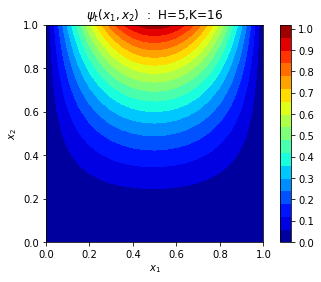

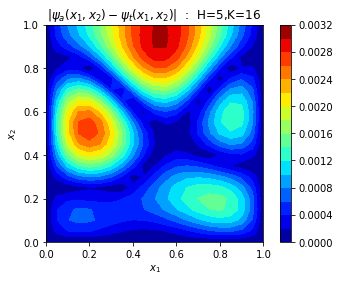

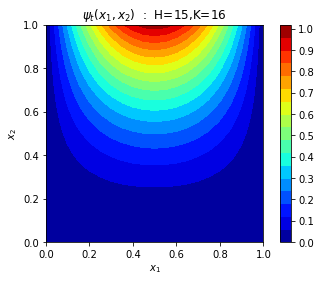

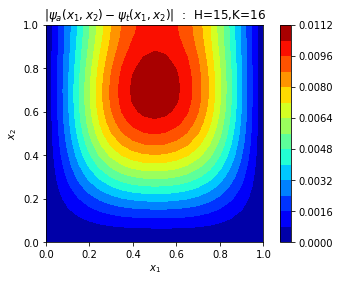

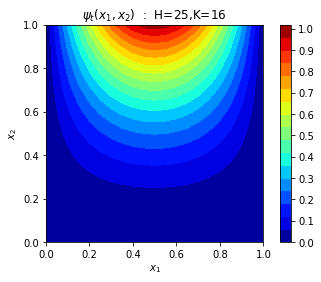

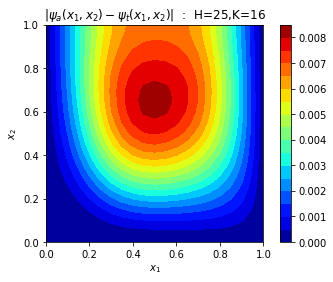

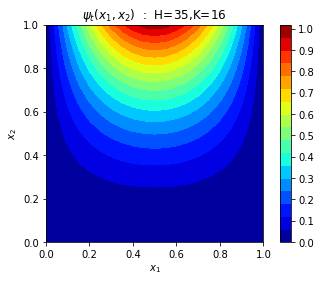

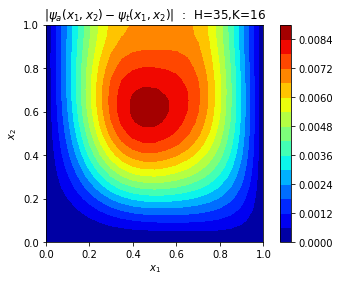

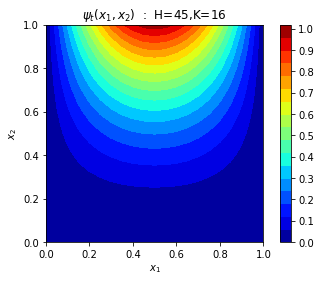

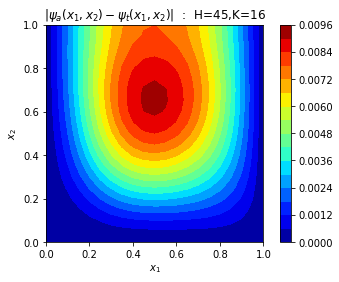

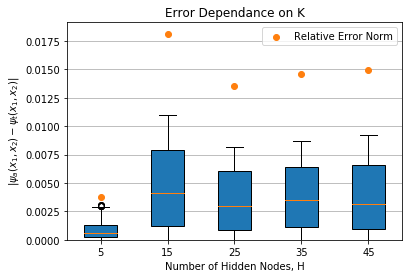

[ 0.0037275   0.01814067  0.0135424   0.01463542  0.01493091]


In [28]:
train_grid_size=16 # default
train_grid_size_array=[8,16,24,32,40]
train_X, train_y= get_train_data(train_grid_size)
#train_X_rb[0]=train_X[0]
#train_X_rb[1,:]=1

test_grid_size=21
test_X, test_y= get_test_data(test_grid_size)
test_X_rb=np.zeros(test_X.shape)
test_X_rb[0]=test_X[0]
test_X_rb[1,:]=1
    
h_size=15 # default
h_size_array=[5,15,25,35,45]

#n_x=np.zeros((test_X.shape[1]))
#n_x_rb=np.zeros((test_X.shape[1]))
#n_x_prime_rb=np.zeros((test_X.shape[1]))
    
n_x_h=np.zeros((5,test_X.shape[1]))
n_x_rb_h=np.zeros((5,test_X.shape[1]))
n_x_prime_rb_h=np.zeros((5,test_X.shape[1]))
    
#n_x_k=np.zeros((5,test_X.shape[1]))
#n_x_rb_k=np.zeros((5,test_X.shape[1]))
#n_x_prime_rb_k=np.zeros((5,test_X.shape[1]))
    
#n_x_grids=np.zeros((4,test_X.shape[1]))
#n_x_rb_grids=np.zeros((4,test.shape[1]))
#n_x_prime_rb_grids=np.zeros((4,test_X.shape[1]))

count=0
    
for h_size in h_size_array:
#for train_grid_size in train_grid_size_array:
#for i in range(1):    
    
    train_X, train_y= get_train_data(train_grid_size)
    train_X_rb=np.zeros(train_X.shape)
    train_X_rb[0]=train_X[0]
    train_X_rb[1,:]=1
    #train_X, train_y= get_train_data_grid_experiment_3()
    
    print("Number of Hidden Nodes=",h_size)
    print("Training Grid Resolution=",train_grid_size)

    # Layer's sizes
    x_size = train_X.shape[0]   # Number of input nodes: 2 features
    #h_size = 6#256             # Number of hidden nodes
    y_size = train_y.shape[1]   # Number of outcomes: 1

    # Symbols
    X = tf.placeholder("float", shape=[x_size,None])
    X_rb = tf.placeholder("float", shape=[x_size,None])
    y = tf.placeholder("float", shape=[y_size,None])

    # Weight initializations
    w_1 = init_weights((h_size, x_size))
    w_2 = init_weights((y_size, h_size))
    b_1= init_weights((h_size, 1))

    # Forward propagation
    yhat    = forwardprop(X, w_1, b_1, w_2)
    yhat_prime_x_1,yhat_prime_x_2=forwardprop_nx_prime(X, w_1, b_1, w_2)
    
    yhat_cost=calc_cost(X,X_rb,w_1, b_1, w_2)
    
    beta=0.0001
    regularizer_1 = tf.nn.l2_loss(w_1)
    regularizer_2 = tf.nn.l2_loss(w_2)
    
    global_step = tf.Variable(0, trainable=False)
    starter_learning_rate = 0.01
    learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 100000, 0.96, staircase=True)

    # Backward propagation
    cost = tf.reduce_mean(tf.losses.mean_squared_error(predictions=yhat_cost,labels=y))#+ beta * regularizer_1+beta * regularizer_1)
    updates = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost,global_step=global_step)

    # Run SGD
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init) 
        
        epoch_range=2000
        train_accuracy=np.zeros(epoch_range)
        test_accuracy=np.zeros(epoch_range)
        
        for epoch in range(epoch_range):
            
            for i in range(train_X.shape[1]):
                sess.run(updates,feed_dict={X:train_X[:,i:i+1],X_rb:train_X_rb[:,i:i+1],y:train_y[i:i+1]})
            
            train_accuracy[epoch]=0
            for i in range(train_X.shape[1]):
                train_accuracy[epoch] += sess.run(cost,feed_dict={X:train_X[:,i:i+1],X_rb:train_X_rb[:,i:i+1],y:train_y[i:i+1]})
            print("Epoch = %d, train accuracy = %.2f%%" % (epoch + 1, train_accuracy[epoch]))
            
            #test_accuracy[epoch]=0
            #for i in range(test_X.shape[1]):
            #    test_accuracy[epoch] += sess.run(cost,feed_dict={X:test_X[:,i:i+1],X_rb:test_X_rb[:,i:i+1],y:test_y[i:i+1]})
            #print("Epoch = %d, test accuracy = %.2f%%" % (epoch + 1, test_accuracy[epoch]))
            
        #testing
        for i in range(test_X.shape[1]):
            #n_x[i]=sess.run(yhat,feed_dict={X:test_X[:,i:i+1]})
            #n_x_rb[i]=sess.run(yhat,feed_dict={X:test_X_rb[:,i:i+1]})
            #n_x_prime_rb[i]=sess.run(yhat_prime_x_2,feed_dict={X:test_X_rb[:,i:i+1]})
            
            n_x_h[count][i]=sess.run(yhat,feed_dict={X:test_X[:,i:i+1]})
            n_x_rb_h[count][i]=sess.run(yhat,feed_dict={X:test_X_rb[:,i:i+1]})
            n_x_prime_rb_h[count][i]=sess.run(yhat_prime_x_2,feed_dict={X:test_X_rb[:,i:i+1]})
            
            #n_x_k[count][i]=sess.run(yhat,feed_dict={X:test_X[:,i:i+1]})
            #n_x_rb_k[count][i]=sess.run(yhat,feed_dict={X:test_X_rb[:,i:i+1]})
            #n_x_prime_rb_k[count][i]=sess.run(yhat_prime_x_2,feed_dict={X:test_X_rb[:,i:i+1]})
            
            #n_x_grids[count][i]=sess.run(yhat,feed_dict={X:test_X[:,i:i+1]})
            #n_x_rb_grids[count][i]=sess.run(yhat,feed_dict={X:test_X_rb[:,i:i+1]})
            #n_x_prime_rb_grids[count][i]=sess.run(yhat_prime_x_2,feed_dict={X:test_X_rb[:,i:i+1]})
        
    count+=1
#calculate_psi(n_x,n_x_rb,n_x_prime_rb)
calculate_psi_loop_h(n_x_h,n_x_rb_h,n_x_prime_rb_h)
#calculate_psi_loop_k(n_x_k,n_x_rb_k,n_x_prime_rb_k)
#calculate_psi_loop_grids(n_x_grids,n_x_rb_grids,n_x_prime_rb_grids)

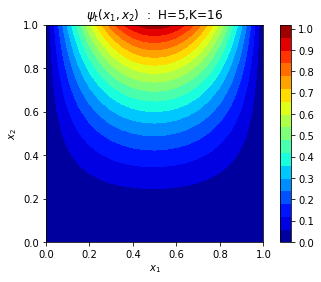

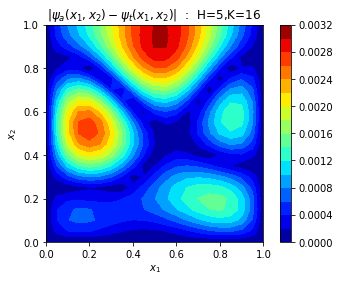

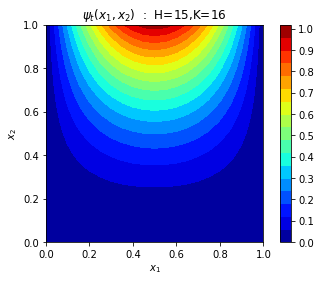

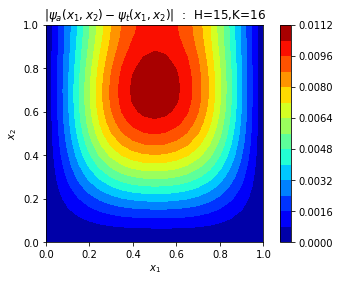

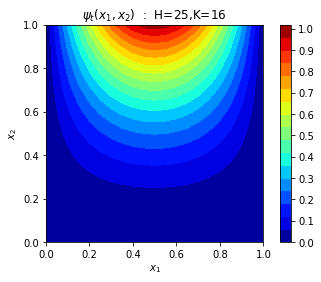

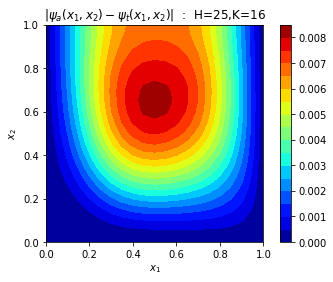

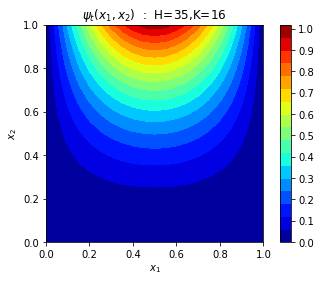

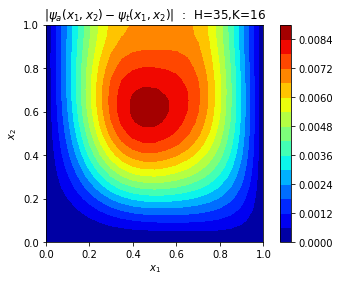

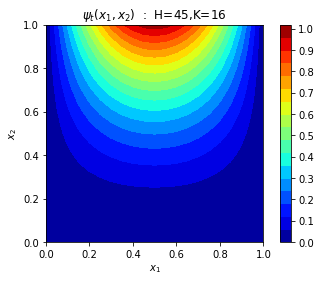

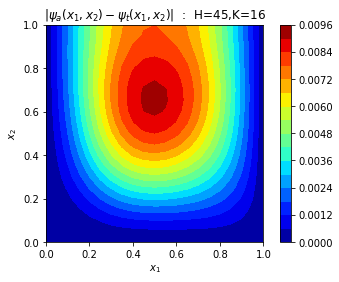

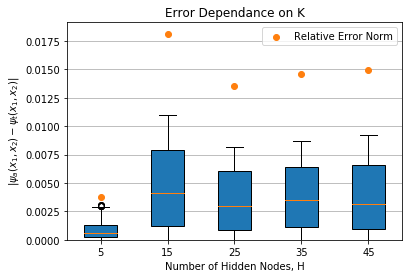

[ 0.0037275   0.01814067  0.0135424   0.01463542  0.01493091]


In [32]:
#np.save('Poisson_n_x_h_Final_2000epoch.npy', n_x_h)
#np.save('Poisson_n_x_rb_h_Final_2000epoch.npy', n_x_rb_h)
#np.save('Poisson_n_x_prime_rb_h_Final_2000epoch.npy', n_x_prime_rb_h)
n_x_h_saved=np.load('Poisson_n_x_h_Final_2000epoch.npy')
n_x_h_rb_saved=np.load('Poisson_n_x_rb_h_Final_2000epoch.npy')
n_x_h_prime_rb_saved=np.load('Poisson_n_x_prime_rb_h_Final_2000epoch.npy')
calculate_psi_loop_h(n_x_h_saved,n_x_h_rb_saved,n_x_h_prime_rb_saved)

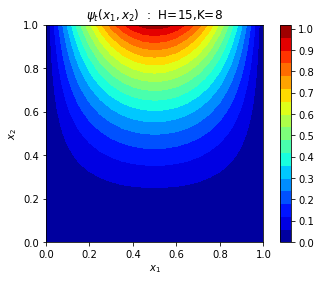

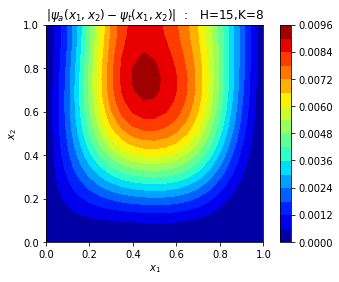

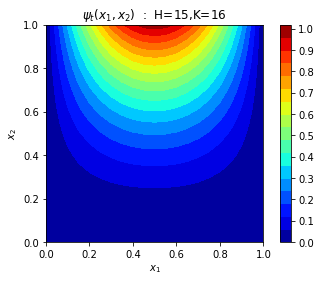

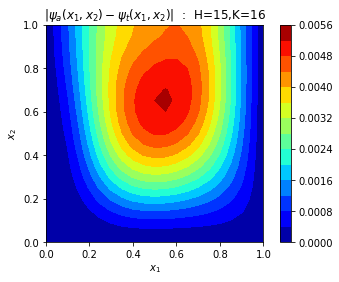

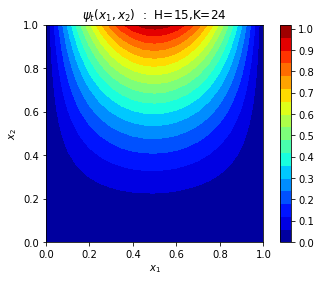

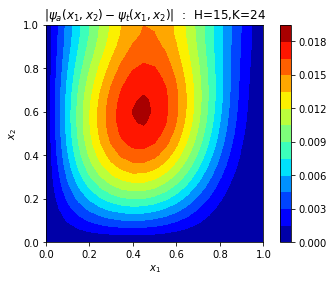

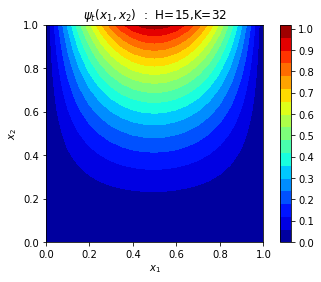

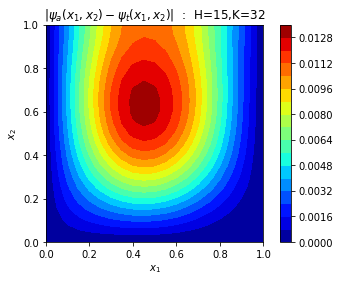

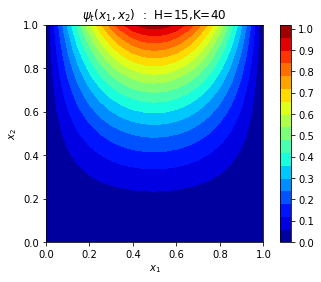

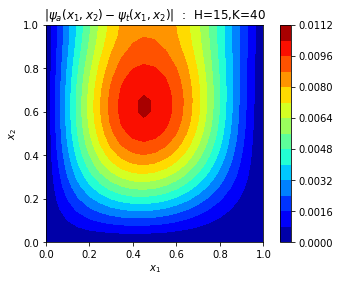

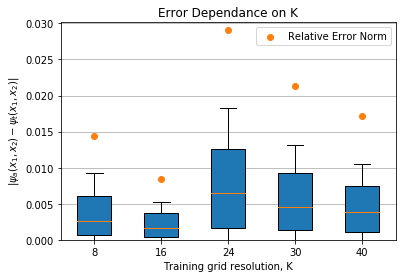

[ 0.01438748  0.00840706  0.02914305  0.02136198  0.01716018]


In [31]:
#np.save('Poisson_n_x_k_Final_2000epoch.npy', n_x_k)
#np.save('Poisson_n_x_rb_k_Final_2000epoch.npy', n_x_rb_k)
#np.save('Poisson_n_x_prime_rb_k_Final_2000epoch.npy', n_x_prime_rb_k)
n_x_k_saved=np.load('Poisson_n_x_k_Final_2000epoch.npy')
n_x_k_rb_saved=np.load('Poisson_n_x_rb_k_Final_2000epoch.npy')
n_x_k_prime_rb_saved=np.load('Poisson_n_x_prime_rb_k_Final_2000epoch.npy')
calculate_psi_loop_k(n_x_k_saved,n_x_k_rb_saved,n_x_k_prime_rb_saved)